In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [5]:
health = pd.read_csv("C:\\Users\\moham\\Downloads\\KaggleV2-May-2016.csv.zip")
health.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
health  = health.drop(['PatientId', 'AppointmentID'], axis=1)

In [11]:
health['ScheduledDay'] = pd.to_datetime(health['ScheduledDay'])
health['AppointmentDay'] = pd.to_datetime(health['AppointmentDay'])
health.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
health['WaitingDays'] = (health['AppointmentDay'] - health['ScheduledDay']).dt.days
health.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [15]:
health['No-show'] = health['No-show'].map({'Yes': 1, 'No': 0})
health.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1


In [17]:
health['Gender'] = health['Gender'].map({'F': 0, 'M': 1})
health= pd.get_dummies(health, columns=['Neighbourhood'], drop_first=True)
health.head()


,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [19]:
health = health.drop(['ScheduledDay', 'AppointmentDay'], axis=1)
health.head()


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0,62,0,1,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
1,1,56,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
2,0,62,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
3,0,8,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
4,0,56,0,1,1,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False


In [21]:
print(health.isnull().sum())


Gender                         0
Age                            0
Scholarship                    0
Hipertension                   0
Diabetes                       0
                              ..
Neighbourhood_SÃO JOSÉ         0
Neighbourhood_SÃO PEDRO        0
Neighbourhood_TABUAZEIRO       0
Neighbourhood_UNIVERSITÁRIO    0
Neighbourhood_VILA RUBIM       0
Length: 90, dtype: int64


In [27]:
X = health.drop('No-show', axis=1)
y = health['No-show']
health.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0,62,0,1,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
1,1,56,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
2,0,62,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
3,0,8,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
4,0,56,0,1,1,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
health.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingDays,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
0,0,62,0,1,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
1,1,56,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
2,0,62,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
3,0,8,0,0,0,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False
4,0,56,0,1,1,0,0,0,0,-1,...,False,False,False,False,False,False,False,False,False,False


In [33]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred = model.predict(X_test)


In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7456346693205465
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17669
           1       0.35      0.31      0.33      4437

    accuracy                           0.75     22106
   macro avg       0.59      0.58      0.59     22106
weighted avg       0.74      0.75      0.74     22106



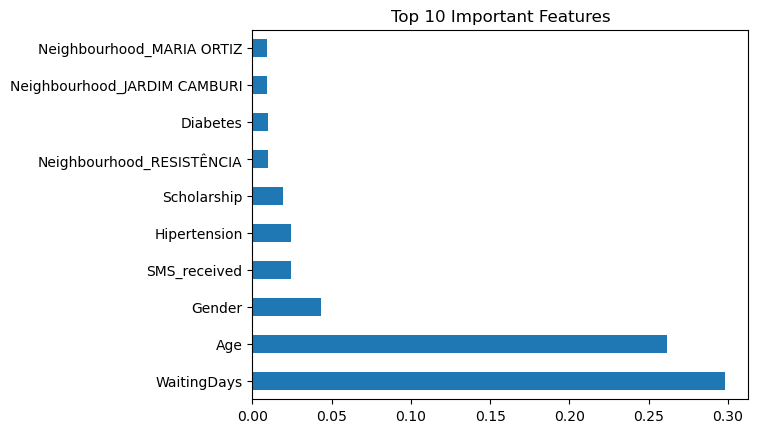

In [39]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [41]:
health.to_csv("C:\\Users\\moham\\Downloads\\KaggleV2-May-2016.csv.zip", index=False)